In [2]:
#importing necessary packages
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import polars as pl

In [ ]:
nodes = pl.read_csv(
    "nodes.csv",
    separator=",",
    encoding="utf8-lossy",  # tolerate encoding errors and BOMs
    ignore_errors=True
) #this uploads the data as a dataframe called "nodes" and enables us to filter the data and drop null (NA) values

nodes.drop_nulls() #drops nulls
filtered_values_race = [1, 2, 3, 4] #can change this to filter out other values from other columns as needed
filtered_values_disabled = [0] #same as above

nodes = nodes.filter(~pl.col("race").is_in(filtered_values_race)) #this would filter out the above values in the race column, so that the only remaining nodes are those of race 5.
nodes = nodes.filter(~pl.col("disabled").is_in(filtered_values_disabled)) #using a similar line of code, we can filter out whichever value of disabled (here I picked 0) at the same time

## important! do not run both this and the other race column one (makes an empty dataframe)
#nodes = nodes.filter(pl.col("race").is_in(filtered_values)) #on the other hand, this would filter in the above race column values so that the remaining nodes are those of every race but race 5

#the "race" column can be replaced with the other column names, and the filtered values can be changed as needed for the project
print(nodes) #displays dataframe

#if we decide a column is irrelevant we can drop it
nodes.drop("housewife")

shape: (2, 14)
┌─────┬──────┬────────┬────────────┬───┬───────────┬──────────┬────────────┬──────────┐
│  id ┆ race ┆ gender ┆ sex.worker ┆ … ┆ housewife ┆ disabled ┆ unemployed ┆ homeless │
│ --- ┆ ---  ┆ ---    ┆ ---        ┆   ┆ ---       ┆ ---      ┆ ---        ┆ ---      │
│ i64 ┆ i64  ┆ i64    ┆ i64        ┆   ┆ i64       ┆ i64      ┆ i64        ┆ i64      │
╞═════╪══════╪════════╪════════════╪═══╪═══════════╪══════════╪════════════╪══════════╡
│ 82  ┆ 5    ┆ 1      ┆ 1          ┆ … ┆ 0         ┆ 1        ┆ 1          ┆ 0        │
│ 160 ┆ 5    ┆ 0      ┆ 0          ┆ … ┆ 0         ┆ 1        ┆ 1          ┆ 0        │
└─────┴──────┴────────┴────────────┴───┴───────────┴──────────┴────────────┴──────────┘


id,race,gender,sex.worker,pimp,sex.work.client,drug.dealer,drug.cook,thief,retired,disabled,unemployed,homeless
i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64
82,5,1,1,0,0,1,0,0,0,1,1,0
160,5,0,0,0,1,0,0,0,0,1,1,0


The nodes dataframe is what we can filter out, and we can use the edge data to see what connections the nodes have.

shape: (56, 2)
┌────────┬───────┐
│  node1 ┆ node2 │
│ ---    ┆ ---   │
│ i64    ┆ i64   │
╞════════╪═══════╡
│ 82     ┆ 1     │
│ 82     ┆ 16    │
│ 82     ┆ 75    │
│ 82     ┆ 85    │
│ 82     ┆ 97    │
│ …      ┆ …     │
│ 160    ┆ 1732  │
│ 160    ┆ 1733  │
│ 160    ┆ 1734  │
│ 160    ┆ 1735  │
│ 160    ┆ 4026  │
└────────┴───────┘


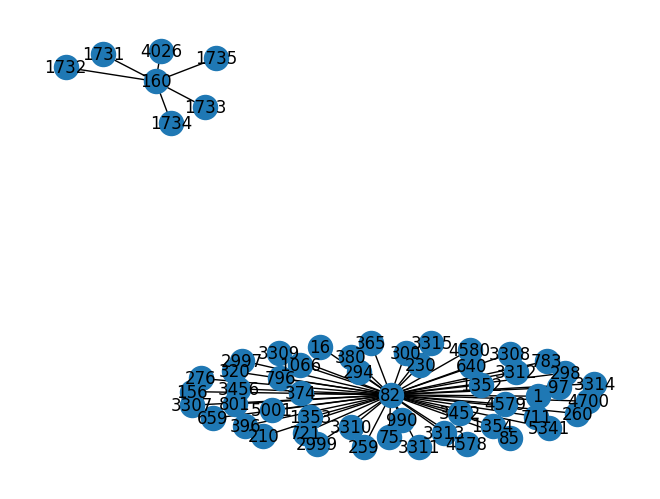

In [ ]:
edges = pl.read_csv("edges.csv")
filtered_values_node1 = [82, 160] #can change this to filter out other values from other columns as needed
edges = edges.filter(pl.col(" node1").is_in(filtered_values_node1)) #now I'm looking at all the connections of node 82 and 160, which is way more manageable than the entire dataset
print(edges)

G = nx.from_pandas_edgelist(edges, source = " node1", target= "node2") #the  node1 column is named with an extra space. Keep this in mind!
nx.draw(G, with_labels=True) #drawing the graph